In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib
import numpy as np
#sns.set()

import glob

pd.options.mode.chained_assignment = None 

In [2]:
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:90% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

In [3]:
baseFolderLoc = "/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/"
folderLocation = baseFolderLoc+"data/"
files = glob.glob(folderLocation+"*txt")
files

['/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_10.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_9.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_0.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_7.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_11.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_6.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_1.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_8.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_2.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_5.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_4.txt',
 '/d/grid15/ln16/pi0eta/testing/pi0eta/logFile/data/composition_3.txt']

In [4]:
listDFs = []
for file in files[0:1]:
    listDFs.append(pd.read_csv(file, delimiter=" ",names=["cuts","topology","composition"]))
data = pd.concat(listDFs, axis=0, ignore_index=True)

In [5]:
#topologies = data.topology.unique()
topologyPercentages = data.topology.value_counts()/len(data)
print(topologyPercentages)
topologies = topologyPercentages[topologyPercentages>0.05].index

print("\n\n")

cuts = data.cuts.unique()
ncuts = len(cuts)
print(cuts)

8#gammap[4#pi^{0},#eta]                                              0.630876
4#gammap[#pi^{0},#eta]                                               0.335033
4#gamma#pi^{#plus}#pi^{#minus}p[2#pi^{0},#eta]                       0.020850
7#gammae^{#plus}e^{#minus}p[4#pi^{0},#eta]                           0.009766
3#gamma#pi^{#plus}#pi^{#minus}p[#pi^{0},#eta]                        0.002437
3#gammae^{#plus}e^{#minus}p[#pi^{0},#eta]                            0.000877
3#gammae^{#plus}e^{#minus}#pi^{#plus}#pi^{#minus}p[2#pi^{0},#eta]    0.000112
6#gamma2e^{#plus}2e^{#minus}p[4#pi^{0},#eta]                         0.000049
Name: topology, dtype: float64



['none' 'locUnusedEnergy' 'showerQuality' 'locChiSqKinFit']


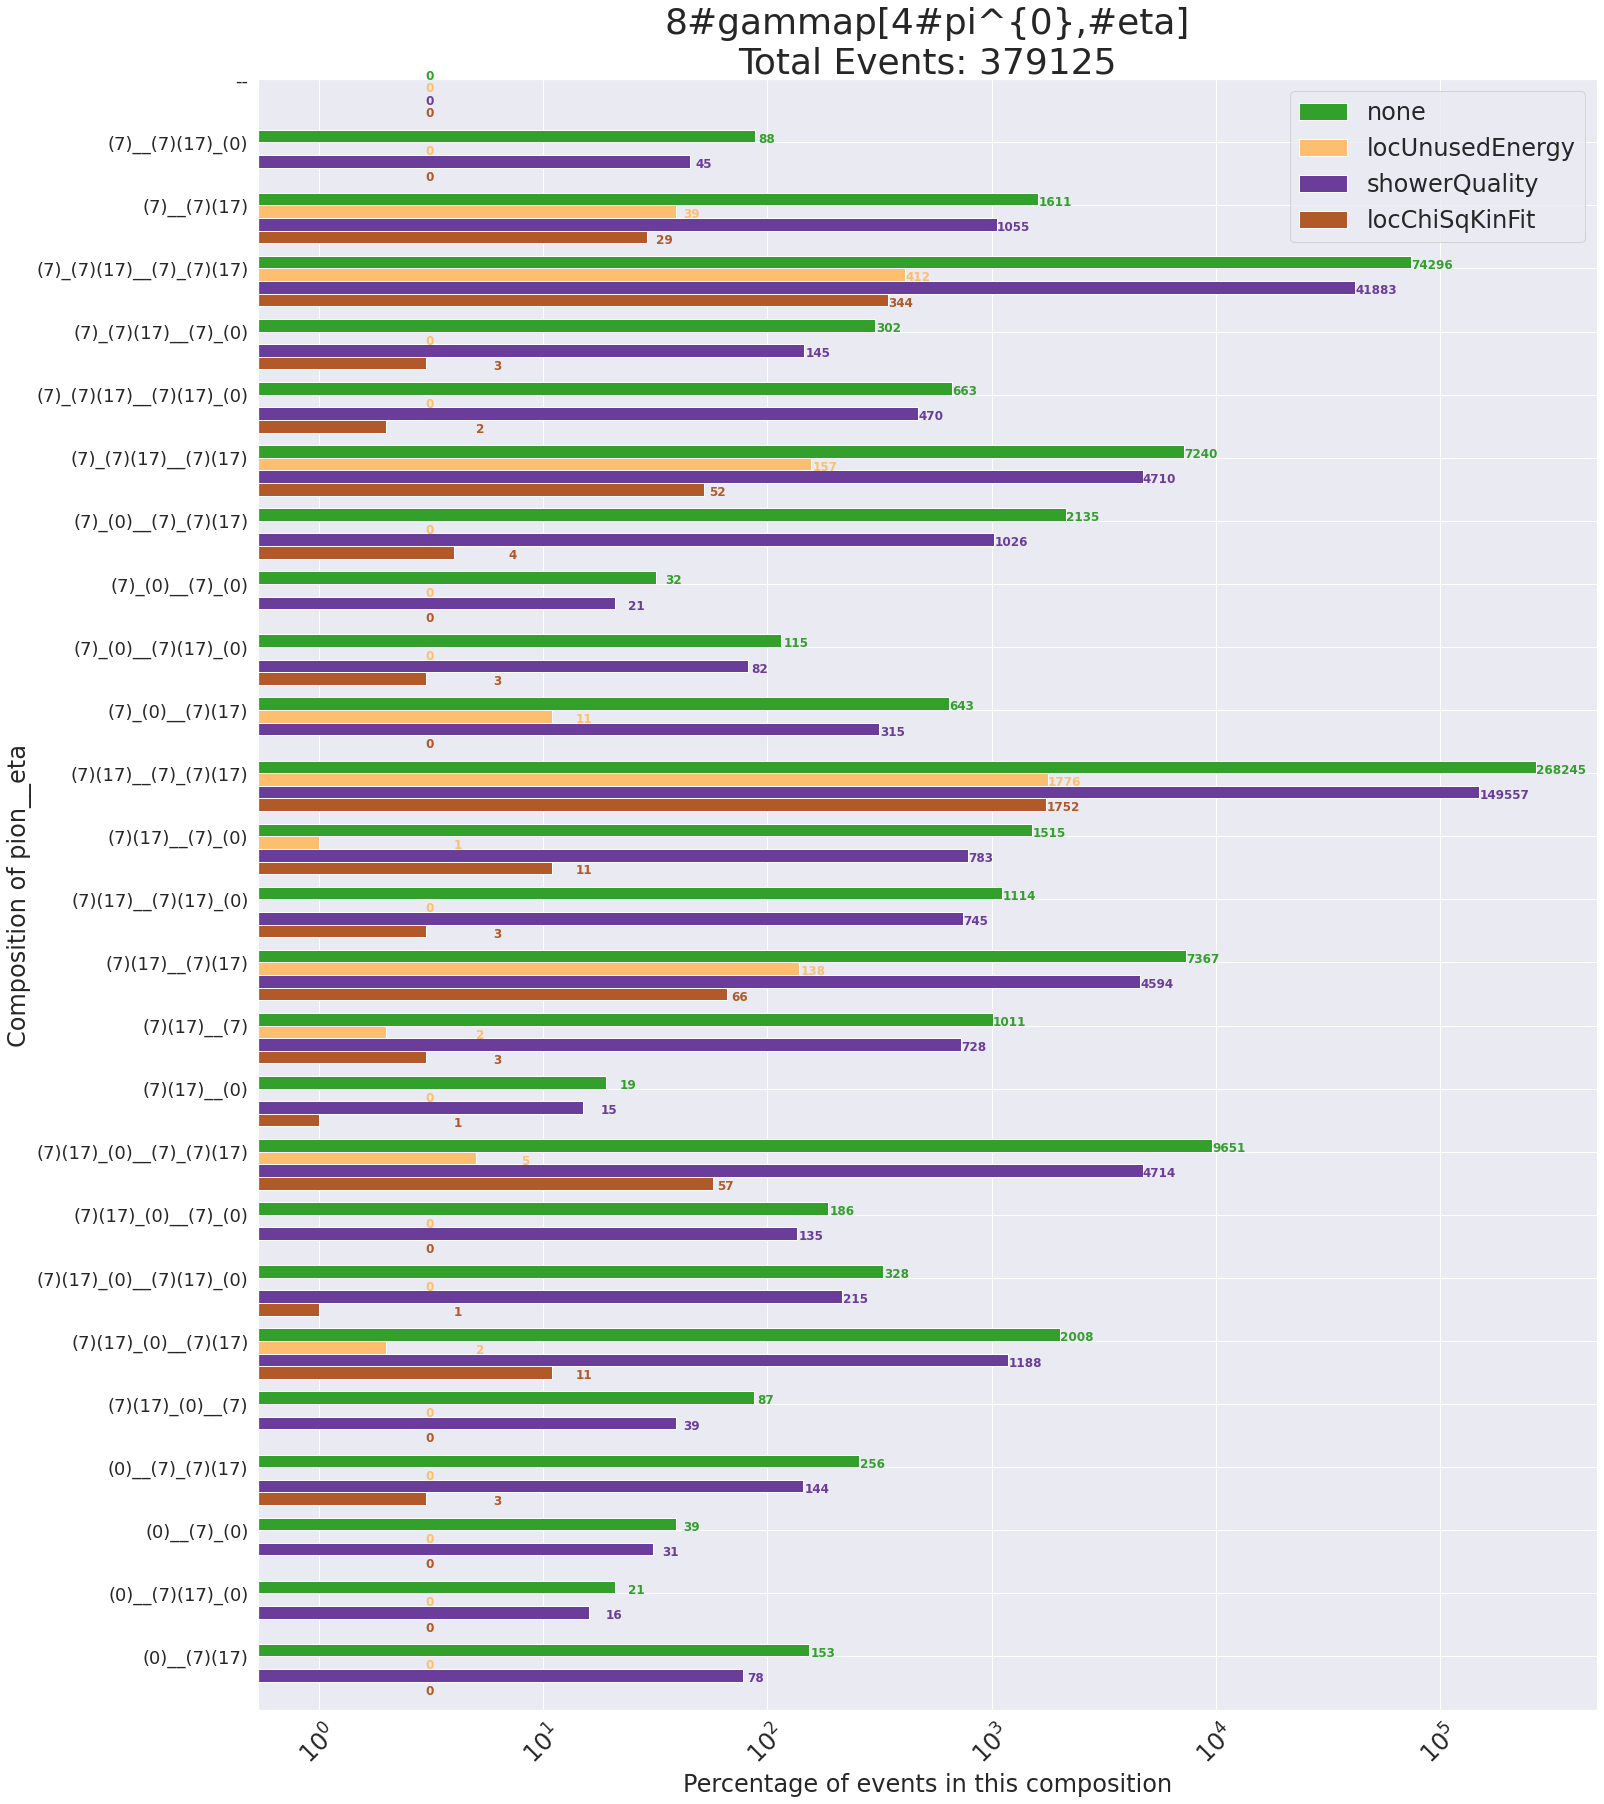

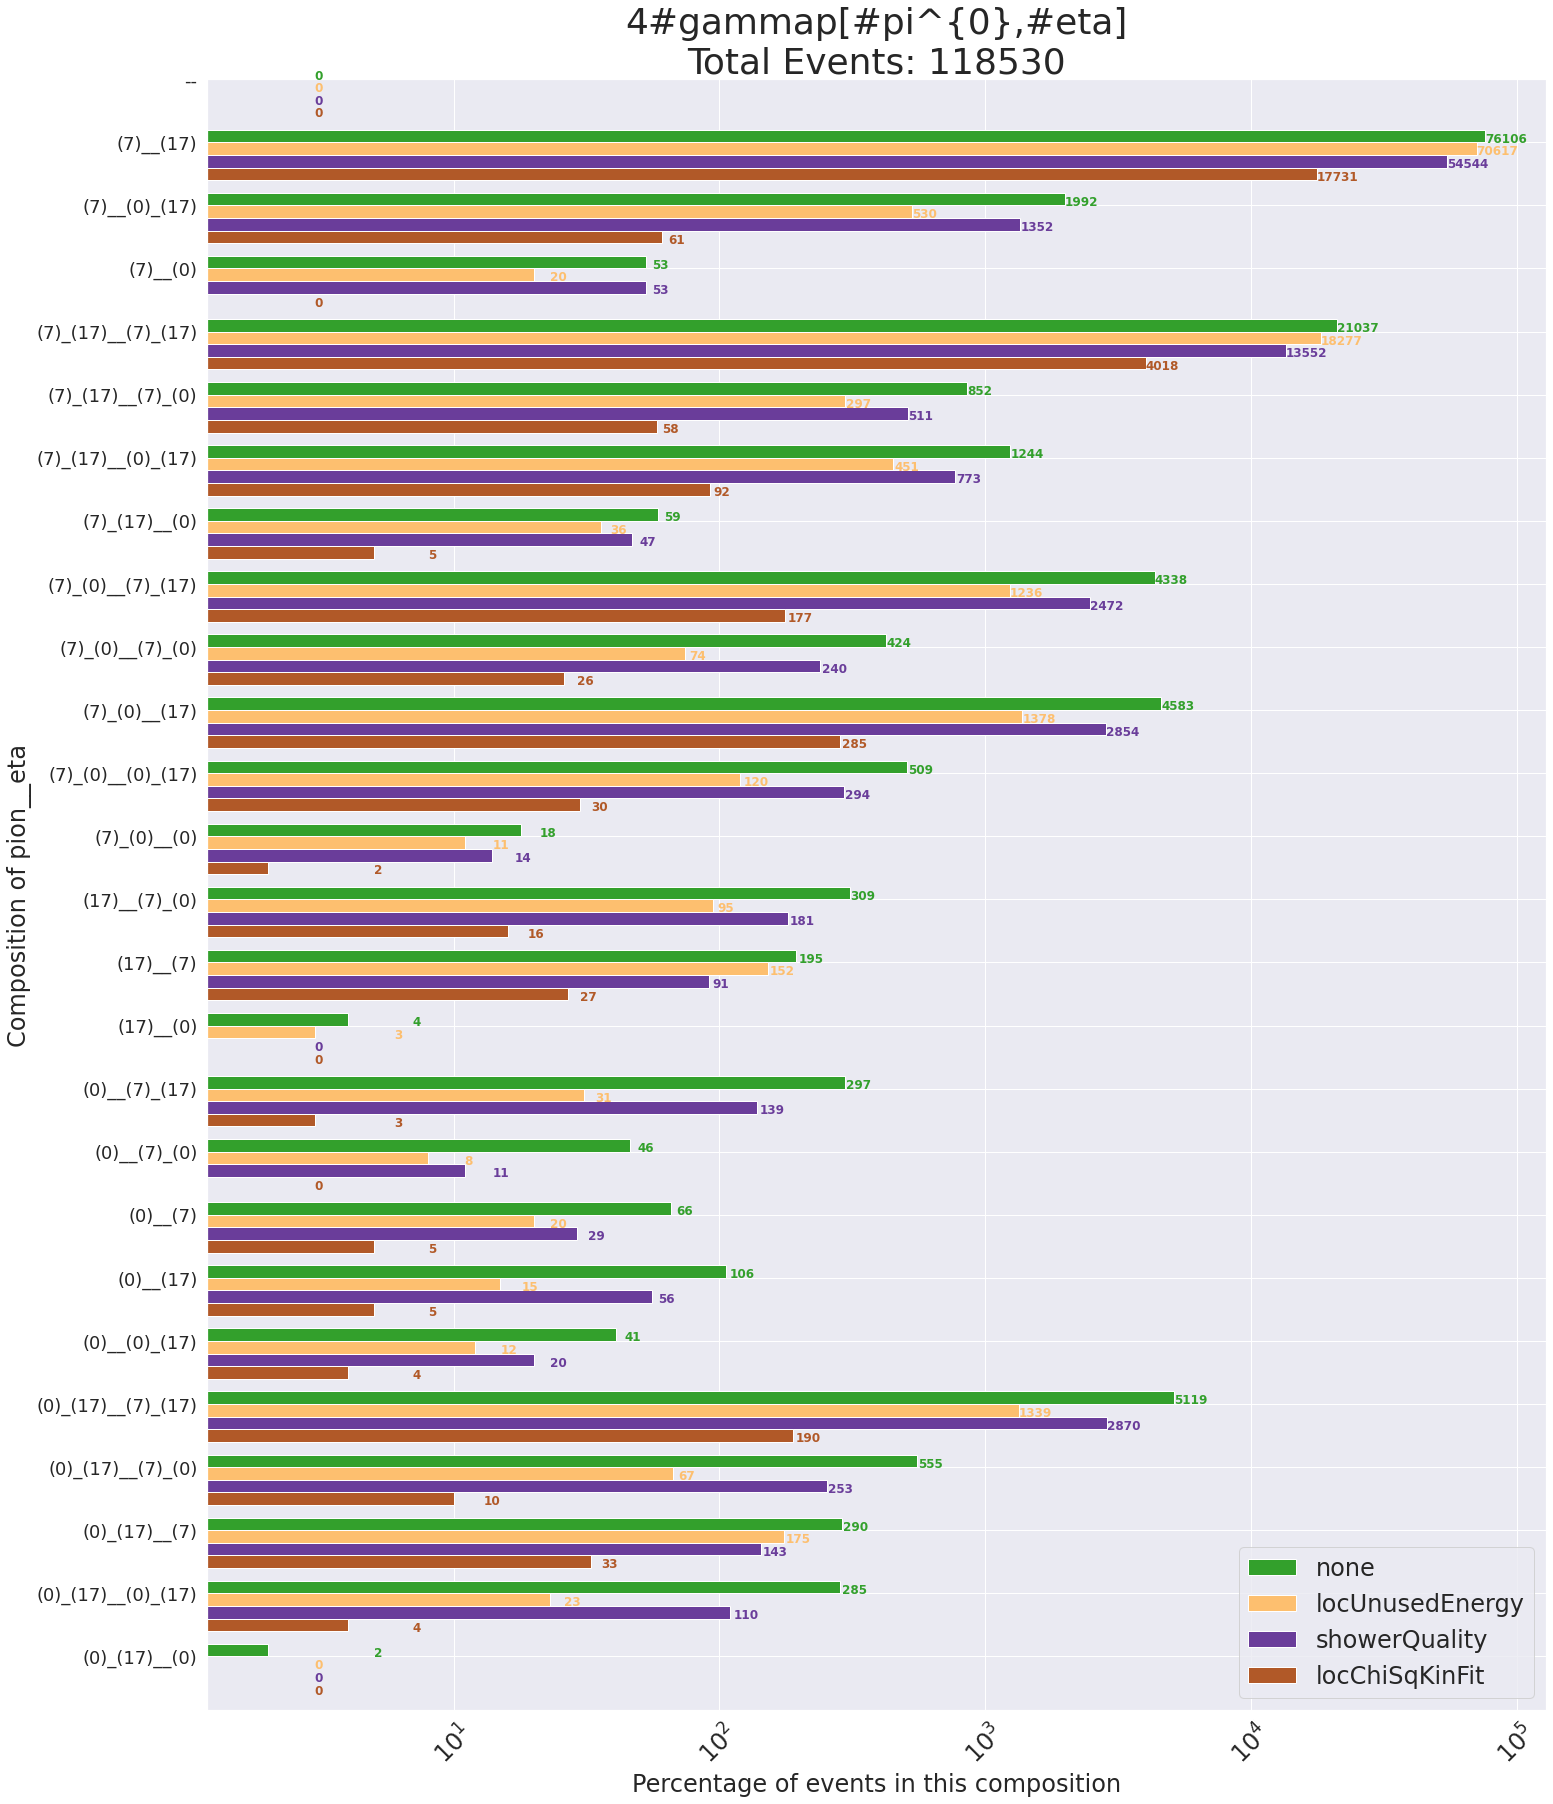

In [18]:
compositionMap = {}


for topology in topologies[0:2]:
    dataSingleTopology = data[(data.topology == topology)]
    uniqueComposition = []

    for string1 in dataSingleTopology.composition:
        splittedStrings = string1.split("_")
        pair1 = set([splittedStrings[0],splittedStrings[1]])
        pair2 = set([splittedStrings[2],splittedStrings[3]])
        uniqueComposition.append("_".join([ele for ele in pair1])+"__"+"_".join([ele for ele in pair2]))

    dataSingleTopology['uniqueComposition'] = uniqueComposition
    fullUniqueSet = dataSingleTopology['uniqueComposition'].unique()
    
    fig,ax = plt.subplots(figsize=(24,30))
    plt.xscale('log')
    plt.xticks(rotation=45,fontsize=24)
    plt.yticks(rotation=45,fontsize=18)
    ax.set_ylabel("Composition of pion__eta",fontsize=24)
    ax.set_xlabel("Percentage of events in this composition",fontsize=24)

    nEventsNoCuts = len(dataSingleTopology[dataSingleTopology.cuts=="none"])
    ax.set_title(topology+"\nTotal Events: "+str(nEventsNoCuts),fontsize=36)
    cmap = matplotlib.cm.get_cmap('Paired')
    sns.set(style="darkgrid")
    
    
    for iCut, cut in enumerate(cuts):    
        subsetData = dataSingleTopology[dataSingleTopology.cuts==cut]
        #plotData = subsetData.value_counts()
        plotData = subsetTest.groupby("uniqueComposition")["weights"].sum()
        for uniqueElement in fullUniqueSet:
            if uniqueElement not in subsetData.unique():
                plotData[uniqueElement] = 0
        plotData["--"]=0
        #print(plotData/len(subsetData))
        plotData = plotData.sort_index()
        
        if len(subsetData)==0:
            print("Topology "+topology+" with cuts="+cut+" has no events")
            continue
        currentColor = cmap((iCut+1)*1.0/(ncuts))
        plotData.plot(x="index",kind="barh",position=iCut,color=currentColor,width=0.2,label=cut)
        for i, v in enumerate(plotData.values):
            text = ax.text(v + 3, i - .2*iCut, str(v), color=currentColor, fontweight='bold')
            #text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),path_effects.Normal()])
    ax.legend(fontsize=24)
    plt.savefig(baseFolderLoc+topology+".png",bbox_inches='tight',alpha=0.3)
    